### Data Exploration and Visualization

In [2]:
# import important libraries 
import pandas as pd
import json
import requests
import json
import os
import pickle
import numpy as np

# libraries for plotting
# imports below are for plotly 
import ipywidgets as widgets
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)   # for offline mode use
import plotly.figure_factory as ff
import plotly.offline as offline
import sys


# matplotlib library for plotting
import matplotlib.pyplot as plt
%matplotlib inline

###
from nltk.probability import FreqDist
import spacy
from collections import Counter

from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator


#### 
from spacy.lang.en.stop_words import STOP_WORDS


# Using nltk library
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize



# helper function for text processing
cwd = os.getcwd() # current working directory
sys.path.append(cwd)
#from textprocessor import nlp_cleaner,stop_words_cleaner,testempty,cleanData,datapreprocess2,datapreprocess
#from plotfunction import linePlot,StackedHistoPLot
from PIL import Image

# nltk convert plural to singular
import inflect
# word corpus
from nltk.corpus import words
from nltk.corpus import wordnet
# stemmer 
from nltk.stem.snowball import SnowballStemmer

from nltk.stem.porter import *

import re

%load_ext autoreload
%autoreload 2

In [2]:
# function to convert plural words to singular
inflectEngine = inflect.engine()
singular = lambda x: inflectEngine.singular_noun(x)

# stemmer
snowBallStemmer = SnowballStemmer("english")

In [3]:
# stopwords to be removed
nltk.download('stopwords')
nltk.download('punkt')
default_stopwords = set(stopwords.words('english')) # stp words


custom_words = ('individual','understanding','continue','hospital','required','specific','diseases', 'although','performance', 'infection', 'pathogen', 'patients','population','different','thus',
                'used','results','available','thus','several','based','role','number','developed','time','improve','possible','many','may',
                'using', ',', 'change', 'level', 'release', 'increase', ';', 'infection','disease','use','need','case','system','disease',
                'likely','host','response','effect','suggest','risk','control','pathogen','infectious','effective','future','technology',
                'opaque', 'infections','type','virus','well', 'associated','studies','effect','provide','potential','information','current','methods',
                'application','management','factor','year','tool','work','area','effects','mechanism','mechanisms','causes','cause',
                'development','system','many','research','including','although','method','human','study','data','health',
                'significant','needed','found','factor','finding','shown','facor','strategies','factors',
                'cell','specie','cells','species','target','common','approach','changes','within','system','compound','transmission',
                'viruses','many','treatment','printed', 'cell', 'model', 'result','patient','important','increased','support')



[nltk_data] Downloading package stopwords to /home/bigdata-
[nltk_data]     lap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/bigdata-
[nltk_data]     lap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
def nlp_cleaner(dataframe_column,stopwords=None,flag=True):
    '''
    function to clean the text in a data frame
    
    input: dataframe column
    
    ouput: cleaned and tokenized dataframe column
    
    '''
    
    # toeknize
    dataframe_columns = dataframe_column.apply(lambda x: word_tokenize(x) )
     # convert all words to lower case to be able to extract stopwords. stopwords are 
    # usually in lower case in nltk library
    dataframe_columns = dataframe_columns.apply(lambda x: [token.lower() for token in x])
    #conclusion = conclusion.apply(lambda x: [token for token in x if token not in default_stopwords])
    dataframe_columns = dataframe_columns.apply(lambda x: [token for token in x if token not in stopwords])
     # remove stop words
    
    if not flag:
        
        return dataframe_columns
    else:
        
        # extract numeric word elements
        dataframe_column = dataframe_column.apply(lambda x: [token for token in x if not token.isnumeric()])
        # remove word elements of length less than 3 
        cutoff_word_length=3
        dataframe_columns= dataframe_columns.apply(lambda x: [token for token in x if len(token)>cutoff_word_length])

        # remove alpha numeric word tokens
        dataframe_columns = dataframe_columns.apply(lambda x: [token for token in x  if not re.match('^(?=.*[0-9]$)(?=.*[a-zA-Z])', token)])
        return dataframe_columns

#### Load data

In [3]:
merged_data = pd.read_parquet('merged_data.parquet.gzip')

In [ ]:
merged_data[merged_data['conclusions']!='']['conclusions']

#### Wordcloud Without Custom StopWord

In [744]:
conclusions = nlp_cleaner(merged_data[merged_data['conclusions']!='']['conclusions'],stopwords=default_stopwords,flag=False)

In [745]:
text_element = conclusions.to_list()
text_element = [item for sublist in text_element for item in sublist]

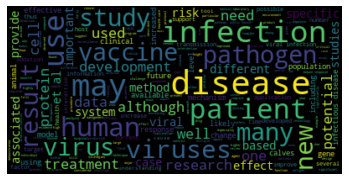

In [746]:
text = ' '.join(text_element)
wordcloud = WordCloud().generate(text)
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Wordcloud With Custom StopWord

In [747]:
# update with custom stopwords
default_stopwords.update(custom_words)

In [748]:
conclusion = nlp_cleaner(merged_data[merged_data['conclusions']!='']['conclusions'],default_stopwords)

In [749]:
text_element = conclusion.to_list()
text_element = [item for sublist in text_element for item in sublist]
#text_element = [singular(item) for  item in text_element  if singular(item)]
cloudStopWords = set(STOPWORDS)


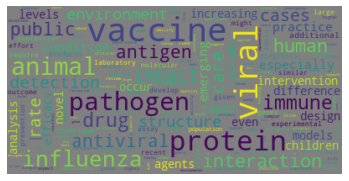

In [750]:
cloudStopWords.update(['outbreaks','evidence','process','model','improved','therapy','become','medical','identified','benefits','gene','agent','programs','still','reduce','lead','case','field','events','vaccination','therapeutic','particular','multiple','surveillance','complex','impacts','remain','compared','high','systems','demonstrated','function','among','level','challenge','various','must','related','present','better','calves','addition','major','clinical','example','appear','product','production','appear','first'])
j = ' '.join(text_element)
wordclouds = WordCloud(stopwords=cloudStopWords,max_font_size=40,background_color='gray').generate(j)
plt.figure()
plt.imshow(wordclouds, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Wordcloud Without Dictionary English Words

In [504]:
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package wordnet to /home/bigdata-
[nltk_data]     lap/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [721]:
text_element = conclusion.to_list()
text_element = [item for sublist in text_element for item in sublist]

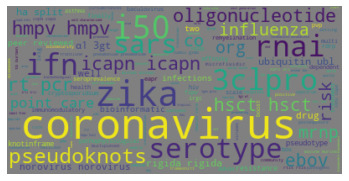

In [725]:
#text_element=[porterStemmer.stem(item) for item in text_element]
#text_element = [singular(item) for  item in text_element  if singular(item)]
#text_element = [token for token in text_element if not token.isnumeric()]
#text_element = [token for token in text_element if not token.isalpha()]
#text_element = [token for token in text_element  if not re.match('^(?=.*[0-9]$)(?=.*[a-zA-Z])', token)]
text_element = [item for  item in text_element  if not wordnet.synsets(item)]
setofwords = set(words.words())
text_element = [item for  item in text_element  if item not in setofwords]

# make wordcloud
j = ' '.join(text_element)
cloudStopWords.update(['point-of-care','reemerging','wageningen','fold','structure','structure-based','structurall','viral','microbiome','prime','founder','author','virally','risk-benefit','rna','biomarkers','ribosomal','prime-boost','prime/boost','throughput','cross','nanoparticles','mg','term','broad','pre','derived','kg','covs','nanoparticle','transgenic','nucleic','dna','frameshifting','coronaviruses','self','protein','induced','pseudoknot','vitro','virus','re','sp','isgs','mers','human','host','pathogen','biochar','one','site','although','cnts','sirna','sirnas','infected','infected','cell','non','associated','mediated','disease','gal','vivo','anti','3cipro','infection','based','specific','hcws','cov','dsrna','others'])
wordclouds = WordCloud(stopwords=cloudStopWords,max_font_size=50,background_color='gray').generate(j)
plt.figure()
plt.imshow(wordclouds, interpolation="bilinear")
plt.axis("off")
plt.show()

### Frequency Analysis in conclusions of corona related articles

In [4]:
text_element = merged_data[merged_data['conclusions']!='']['conclusions'][0:2000].tolist()
text_element = [item for item in text_element ]
text = ' '.join(text_element)
stop_words = set(stopwords.words('english'))

In [5]:
custom_words = ('supplemental material).','.',').','(Fig.','Figure','Fig','As shown Fig.','.','6','(', 'Figure 2')
stop_words.update(custom_words)

In [6]:
# split text and remove some words
text2 = ' '.join(w for w in text.split() if w not in stop_words)
#text2 = ' '.join(w for w in text.split() if w not in stop_sentences)
text2 = ' '.join(w for w in text2.split() if  not  re.match('^(?=.*[0-9]$)(?=.*[a-zA-Z])', w))
text2 = ' '.join(w for w in text2.split() if    not  w.isnumeric())
text2 = ' '.join(re.sub(r"\s*[0-9]+([.]|$)", r"\1", w) for w in text2.split() )
# sentence teokenize
tokenized_nostops=sent_tokenize(text2) # sentence_tokenize the text


In [7]:
# sentences to remove. This will be updated
stop_sentences = set(["Fig."])
# counter tells after how many frequency counto record the words of interes
counter = 2
# i counto check if the counter value has been reached
i=0
# update with more values
update = False
# controls when to stop loop
stop = 7
# cut off index. this is an hyperparameter
cut_off = 16
while True:
    tokenized_nostops = [w for w in tokenized_nostops if w not in stop_sentences]
    tokenized_nostops =[w for w in tokenized_nostops if w not in stop_words]
    #tokenized_nostops = [re.sub(r"\s*[0-9]+([.]|$)", r"\1", w) for w in tokenized_nostops]
    freq = Counter(tokenized_nostops) # counter to compute frequency
    i+=1
    
    top_10_indications = freq.most_common(30)
    stop_sentences.update([i[0] for i in top_10_indications])
    if update : 
        ofInterest.append([i for i in top_10_indications if top_10_indications.index(i)>cut_off])
        counter += 1
        i=0;
    if i == counter:
        ofInterest = top_10_indications
        update = True
    if counter > stop:
        break
        
    

In [8]:
ofInterest[0]

('Many fields virology moving toward standardized models used across institutions test vaccines therapeutics.',
 4)

### Extractions of conclusiond with 'Corona' mention

In [17]:
# conclusions about corona
#text_element = merged_data[merged_data['conclusions']!='']['conclusions'][0:2000].tolist()
#text_element = [item for item in text_element ]
#text = ' '.join(text_element)
tokenized_nostops=sent_tokenize(text) # sentence_tokenize the text

# sentences to remove. This will be updated
stop_sentences = set(["Fig."])
# words to be tested 
test = ['corona', 'coronavirus','cov','cov-19']
# words of interest
ofInterests = [];
keep =[]
counter = 100
i=0
while True:
    tokenized_nostops = [w for w in tokenized_nostops if w not in stop_sentences]
    #tokenized_nostops =[w for w in tokenized_nostops if w not in stop_words]
    #tokenized_nostops = [re.sub(r"\s*[0-9]+([.]|$)", r"\1", w) for w in tokenized_nostops]
    freq = Counter(tokenized_nostops) # counter to compute frequency
    top_10_indications = freq.most_common(30)
    stop_sentences.update([i[0] for i in top_10_indications])
    
    i+=1
    
    temp = []
    for k in test:
        l = [i for i in top_10_indications if k in  i[0].lower() ]
        temp.append([i for i in l if i])
        q = [j for i in temp for j in i if j]
        keep.append(q)
        temp=[]
    
    if not tokenized_nostops :
        break
ofInterests  = [i[0] for i in keep if i]


In [18]:
ofInterests = [i[0] for i in ofInterests] # clean up inner list from the collection

In [21]:
# words to be fltered from the conclusions to
# enable only corona conclusions to be retained 
filterWords = ['coronary','Weissleder','coverage','discover','discovers','discoveries','discovered', 'recovery','coverage', 'covers','cover','covered','covalent']

h=0 # for indexing
for k in test2:
    q=[] # temp storage for the filtered conclusions
    q.append([i[:] for i in ofInterests if k not in i.lower()]) # remove the words if in the paper
    #pint(q)
    h+=1
    if not any(q):
        break
    ofInterests = q[0] # reassign the filtered paper to ofInterests to avoid duplicate
    


### plots of Frequent conclusions

In [30]:
from random import randrange, uniform

val = list(set(ofInterests))
x  =  [uniform(-100, 400) for p in range(0, len(val)  )]
y  =  [uniform(-200, 1000) for p in range(0, len(val)    )]



from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d
from bokeh.plotting import figure, output_file, show

output_file("conclusions.html", title="conclusions.py example")

source = ColumnDataSource(data=dict(height=x,
                                    weight=y,
                                    names=val))

p = figure(title='Most Frequent Word Sentences in Conclusions',x_range=Range1d(900, 0),
           plot_width=1000, plot_height=900)
p.scatter(x='weight', y='height', size=8, source=source)
p.xaxis[0].axis_label = 'x-position'
p.yaxis[0].axis_label = 'y-position'

labels = LabelSet(x='weight', y='height', text='names', level='glyph',
              x_offset=-5, y_offset=0, source=source, render_mode='canvas')

citation = Label(x=0, y=0, x_units='screen', y_units='screen',
                 text='Collected by adderbyte', render_mode='css',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0)

p.add_layout(labels)
p.add_layout(citation)

show(p)

### Putting related terms and Phrase together from paper Abstract

In [1593]:
nlp = spacy.load('en') #spacy

In [32]:
import scattertext as st # make use of the scatter text library

In [33]:
merged = merged_data[['source_x','abstract','title']].copy(deep=True)

In [36]:
merged.source_x.unique()

array(['PMC', 'CZI', 'Elsevier', 'medrxiv', 'biorxiv'], dtype=object)

In [ ]:
nlp.Defaults.stop_words = {"electronic","supplementary",'online', 'version', ''}

In [ ]:
from scattertext import SampleCorpora, PhraseMachinePhrases, dense_rank, RankDifference, AssociationCompactor, produce_scattertext_explorer
from scattertext.CorpusFromPandas import CorpusFromPandas

corpus = (CorpusFromPandas(merged,
                           category_col='source_x',
                           text_col='abstract',
                           feats_from_spacy_doc=PhraseMachinePhrases(),
                           nlp=spacy.load('en', parser=False))
          .build().compact(AssociationCompactor(4000)))

html = produce_scattertext_explorer(corpus,
                                    category='PMC, medrxiv,biorxiv ',
                                    category_name='PMC Journal',
                                    #not_category_name='Republican',
                                    minimum_term_frequency=8,
                                    pmi_threshold_coefficient=5,
                                    transform=dense_rank,
                                    metadata=corpus.get_df()['title'],
                                    term_scorer=RankDifference(),
                                    width_in_pixels=1000)
open("Convention-Visualization2.html", 'wb').write(html.encode('utf-8'))